In [1]:
import tensorflow

C:\Users\Jay\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
print("Jay Ganesh")

Jay Ganesh


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [38]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [5]:
len(xtrain)

60000

In [6]:
len(ytrain)

60000

In [7]:
len(xtest)

10000

In [8]:
xtrain.shape

(60000, 28, 28)

In [9]:
#As we can see in the above output that we have an array of size 28x28 displaying each pixel of that image
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

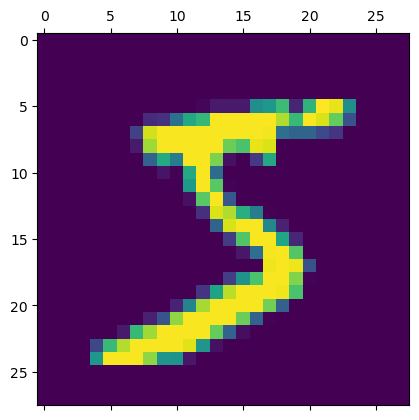

In [14]:
#The image is black and white so 2 dimensional
#We can plot the image directly from the matrix using below function
plt.matshow(xtrain[0])
plt.show()

In [15]:
ytrain[0]

np.uint8(5)

In [39]:
xtrain=xtrain/255
xtest=xtest/255

In [40]:
#In the xtrain we just displayed the image and using the ytrain we got to know about the actual output that is 5
# Now we need to flatten our 2 dimensional array into one dimensional
xtrainflatten=xtrain.reshape(len(xtrain),28*28) #first one is the no. of image and we don't want to edit but we just want to flatten the image pixel so in the 
#second argument we have passed 28*28 to reshape the 28 x 28 into 28*28 pixel i.e flatten it
#Same implies on testing data so we will also do the same operation there
xtestflatten=xtest.reshape(len(xtest),28*28)

In [34]:
xtrainflatten.shape

(60000, 784)

In [35]:
xtestflatten.shape

(10000, 784)

In [47]:
#Let's first define a very simple Neural Network first, This can be achieved by Keras.Sequential and inside it
#passing keras.layers.Dense(output,input,activation_function) Dense allows us to make the Neural Network dense
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [51]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(xtrainflatten,ytrain,epochs=4)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.2665
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9267 - loss: 0.2617
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9280 - loss: 0.2582
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9290 - loss: 0.2553


In [53]:
model.evaluate(xtestflatten,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9275 - loss: 0.2650   


[0.2649918496608734, 0.9275000095367432]

In [54]:
model.predict(xtestflatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([[8.5794711e-03, 2.8526600e-08, 1.5921557e-02, ..., 9.9984342e-01,
        8.2859762e-02, 7.1058369e-01],
       [3.3447021e-01, 2.9839766e-03, 9.9959075e-01, ..., 1.1885678e-14,
        1.4646624e-01, 2.2182844e-11],
       [2.0831522e-04, 9.9424750e-01, 6.7997509e-01, ..., 6.4700253e-02,
        4.0455297e-01, 4.6746477e-02],
       ...,
       [2.0858424e-06, 6.4702755e-07, 6.5757975e-04, ..., 2.3567973e-01,
        5.9998786e-01, 8.1181026e-01],
       [2.8114002e-05, 2.7037671e-05, 3.3746328e-05, ..., 2.0480818e-05,
        7.4572563e-01, 2.6816422e-05],
       [1.6879337e-03, 1.0411932e-11, 7.3980100e-02, ..., 1.5778469e-10,
        5.5349723e-05, 4.1539220e-08]], dtype=float32)

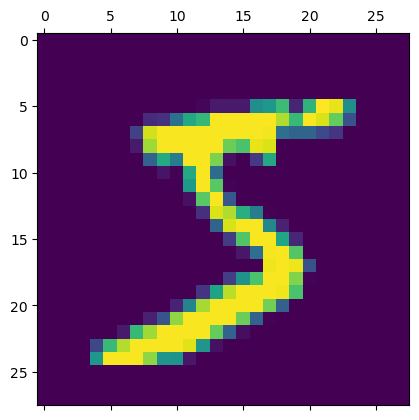

In [57]:
plt.matshow(xtrain[0])
plt.show()

In [58]:
print(ytrain[0])

5


In [61]:
y_predict=model.predict(xtestflatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


In [64]:
y_predict[0]
#It will probability of number not the actual answer

array([8.5794711e-03, 2.8526600e-08, 1.5921557e-02, 9.6644312e-01,
       1.1316704e-03, 1.3115810e-01, 3.3996049e-08, 9.9984342e-01,
       8.2859762e-02, 7.1058369e-01], dtype=float32)

In [66]:
np.argmax(y_predict[0])
#Using argax we can find out the index which has the highest probability among all

np.int64(7)

In [68]:
#Now Let's try to make a confusion matrix using tf.math.confusionmatrix(labels,predictions)
#Before that we need to convert ypredict into values that has highest probability because predictions does not take value as array
y_label=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1105,    3,    2,    0,    1,    4,    2,   18,    0],
       [   6,    8,  920,   18,    7,    3,   12,   12,   41,    5],
       [   2,    0,   13,  928,    0,   20,    2,   11,   28,    6],
       [   2,    1,    3,    2,  911,    0,    9,    4,   11,   39],
       [   8,    2,    2,   39,   10,  770,   11,    8,   35,    7],
       [  12,    3,    7,    1,    7,   13,  910,    2,    3,    0],
       [   1,    6,   21,    6,    7,    0,    0,  946,    3,   38],
       [   7,    4,    7,   17,    9,   19,    7,   10,  883,   11],
       [  11,    6,    1,    9,   18,    4,    0,   15,    8,  937]],
      dtype=int32)>

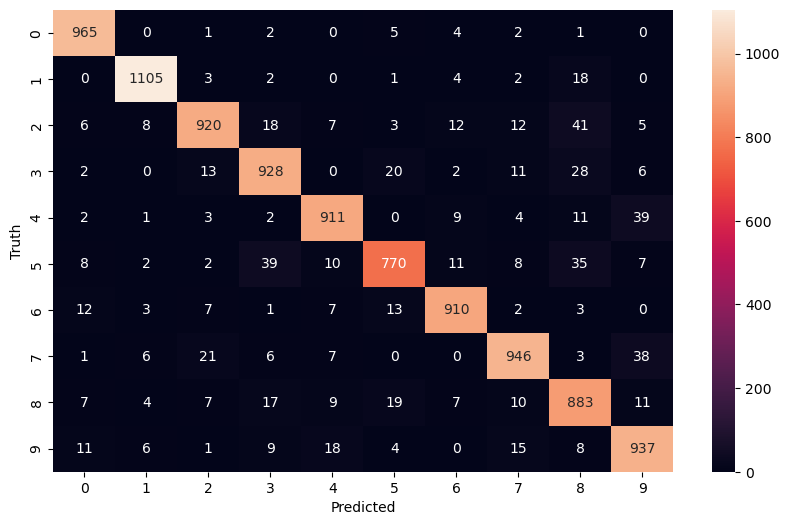

In [76]:
#Above is something we can understand but not visually easy so we will use seaborn library to perform 
#this task
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [74]:
# the numbers that are not in diagonal are nothing but the False prediction in our code
#Now let's work with one hidden layer
#In the above prediction we hade just input and output layer no hidden layer this hidden layer would help in optimizing the accuracy
#of our actual model
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrainflatten,ytrain,epochs=6)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8957 - loss: 0.3575
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9535 - loss: 0.1596
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9653 - loss: 0.1174
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9718 - loss: 0.0937
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9768 - loss: 0.0772
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9796 - loss: 0.0658


In [75]:
model.evaluate(xtestflatten,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0980   


[0.097972072660923, 0.9711999893188477]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


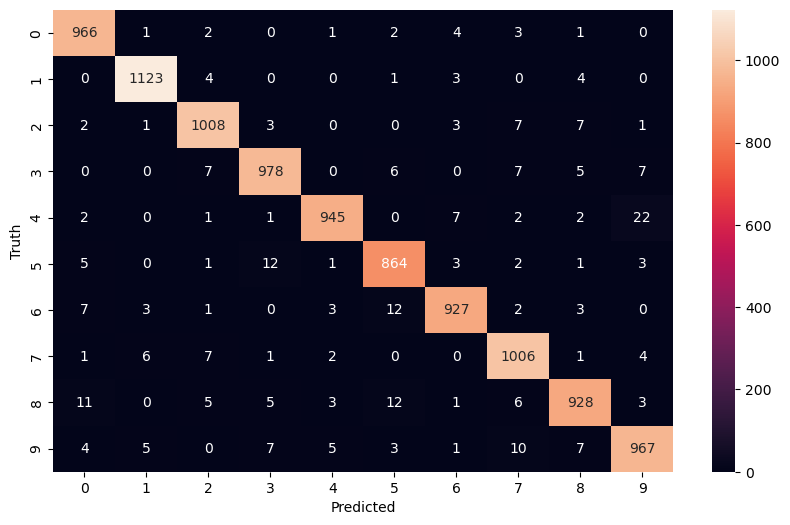

In [77]:
y_predict=model.predict(xtestflatten)
y_label=np.argmax(y_predict,axis=1)
# y_label=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_label)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# You can check the accuracy of neural network with hidden layers
#Clearly there is a difference in accuracy with only simple NN and with Hidden layer NN model.

Now there is one overhead over here that is flattening the X pixel but Tensorflow allows an inbuilt
function to auto convert the input without flattening it tensorflow will do our work

In [80]:
# the numbers that are not in diagonal are nothing but the False prediction in our code
#Now let's work with one hidden layer
#In the above prediction we hade just input and output layer no hidden layer this hidden layer would help in optimizing the accuracy
#of our actual model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60,activation='relu'),
    # keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=6)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9167 - loss: 0.3012
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9578 - loss: 0.1487
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9683 - loss: 0.1078
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9755 - loss: 0.0840
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9785 - loss: 0.0697
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0593


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


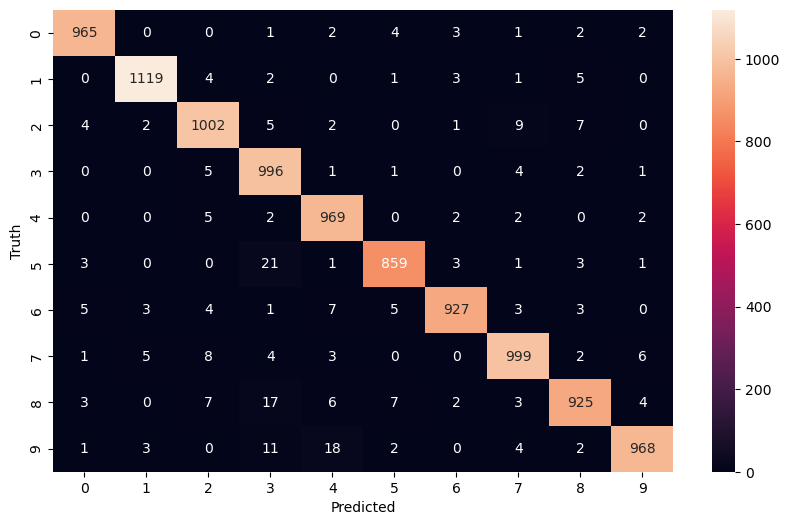

In [81]:
y_predict=model.predict(xtest)
y_label=np.argmax(y_predict,axis=1)
# y_label=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_label)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [82]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.0970    


[0.09698433429002762, 0.9728999733924866]

Now Lets try to experiment with different activation Function which are as follow and try to understand
how this experiment helps in enhancing the accuracy of the model

In [83]:
# the numbers that are not in diagonal are nothing but the False prediction in our code
#Now let's work with one hidden layer
#In the above prediction we hade just input and output layer no hidden layer this hidden layer would help in optimizing the accuracy
#of our actual model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=6)


C:\Users\Jay\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9127 - loss: 0.3085
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9547 - loss: 0.1559
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9664 - loss: 0.1153
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9732 - loss: 0.0900 
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9775 - loss: 0.0741
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9812 - loss: 0.0618


In [84]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9716 - loss: 0.0905


[0.0904725193977356, 0.9715999960899353]

Here we can see our model gave us accuracy of 98% in the traning part but in test part
it gave us only 97% accuracy.

Sigmoid suits binary tasks; softmax normalizes multi-class outputs for sparse_categorical_crossentropy.

Now Let's try tanh function for the same thing

In [85]:
# the numbers that are not in diagonal are nothing but the False prediction in our code
#Now let's work with one hidden layer
#In the above prediction we hade just input and output layer no hidden layer this hidden layer would help in optimizing the accuracy
#of our actual model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=6)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9130 - loss: 0.3104
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9547 - loss: 0.1575
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9654 - loss: 0.1177
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9730 - loss: 0.0934
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9781 - loss: 0.0769
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9816 - loss: 0.0650 


In [86]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9704 - loss: 0.0986    


[0.09864068776369095, 0.9703999757766724]

98% on training but 97% on test so still same type of accuracy only

TANH:Zero-centered (-1 to 1) unlike sigmoid (0-1); steeper gradients but saturates.

In [87]:
# the numbers that are not in diagonal are nothing but the False prediction in our code
#Now let's work with one hidden layer
#In the above prediction we hade just input and output layer no hidden layer this hidden layer would help in optimizing the accuracy
#of our actual model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
                       ])
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=6)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9129 - loss: 0.3069
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9512 - loss: 0.1669
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9627 - loss: 0.1279
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9691 - loss: 0.1058
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9733 - loss: 0.0912
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9768 - loss: 0.0795


In [88]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9694 - loss: 0.0962    


[0.09619180858135223, 0.9693999886512756]

Optimizer RMSprop gave us 97% on training and 96% on testing not that good as earlier so leave it

In [89]:
# the numbers that are not in diagonal are nothing but the False prediction in our code
#Now let's work with one hidden layer
#In the above prediction we hade just input and output layer no hidden layer this hidden layer would help in optimizing the accuracy
#of our actual model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(60,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
                       ])
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=6)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8363 - loss: 0.6610
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8977 - loss: 0.3696
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9101 - loss: 0.3197
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9177 - loss: 0.2916
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9236 - loss: 0.2713
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9281 - loss: 0.2545


In [90]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9318 - loss: 0.2403    


[0.2402946799993515, 0.9318000078201294]

Worst Accuracy till now so SGD also doesn't work for us Now let's try working with loss function

Sorry but we can't really use any other loss function here